In [28]:
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import fisher_exact
plt.rcParams['figure.figsize'] = 12, 7

In [30]:
pop = pd.read_csv('data/pub_stats.csv').dropna()
samp = pd.read_csv('data/clean_reception.csv').dropna()

In [31]:
pop_auths = pop.groupby('Author').size()
samp_auths = samp.groupby('Author').size()
pop_prints = pop.groupby('Printer').size()
samp_prints = samp.groupby('Printer').size()
pop_place = pop.groupby('Place of Publication').size()
samp_place = samp.groupby('Place of Publication').size()

In [65]:
auths = pd.concat([samp_auths, pop_auths], axis=1, keys=["obsv", "exp"]).fillna(0)
top_auths = auths[auths.exp > 4]
bot_auths = auths[auths.exp < 5]
top_auths.ix["other"] = [sum(bot_auths.obsv.values), sum(bot_auths.exp.values)]
top_auths.exp = top_auths.exp.apply(lambda x: x / sum(top_auths.exp.values))
top_auths.obsv = top_auths.obsv.apply(lambda x: x / sum(top_auths.obsv.values))
top_auths

,obsv,exp
"Aleman, Mateo",0.091837,0.113208
"Cervantes Saavedra, Miguel",0.142857,0.124528
"Ledesma, Alonso de",0.086735,0.132075
"Lope de Vega Carpio, Fenix",0.352041,0.324528
"Lujan de Sayavedra, Mateo",0.025510,0.026415
"Rojas Villandrando, Agustin",0.020408,0.022642
"Salas Barbadillo, Alonso Jeronimo",0.030612,0.030189
"Suarez de Figueroa, Cristobal",0.030612,0.026415
"Valdivielso, Jose de",0.015306,0.033962
other,0.204082,0.166038


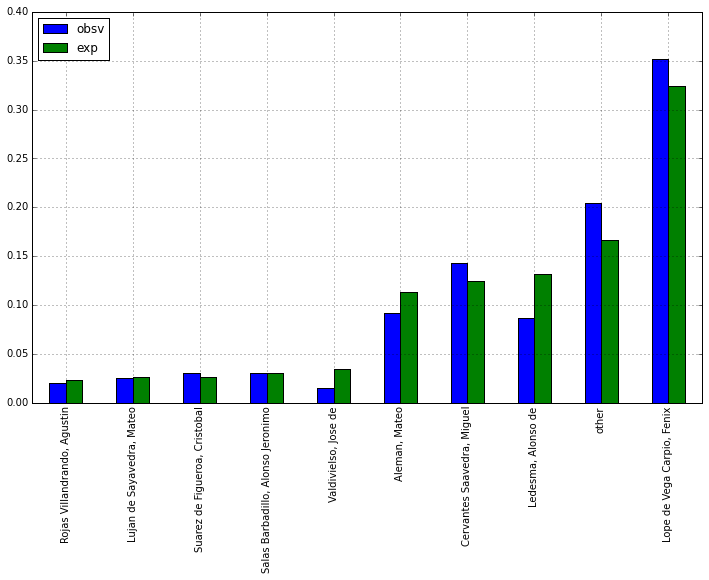

In [56]:
auths = top_auths.sort(columns="exp")
auths.plot(kind="bar")

In [57]:
chisquare(auths.obsv.values, auths.exp.values)

(0.044518942785047991, 0.99999999931284766)

In [58]:
prints = pd.concat([samp_prints, pop_prints], axis=1, keys=["obsv", "exp"]).fillna(0)
top_prints = prints[prints.exp > 4]
bot_prints = prints[prints.exp < 5]
top_prints.ix["other"] = [sum(bot_prints.obsv.values), sum(bot_prints.exp.values)]
top_prints.exp = top_prints.exp.apply(lambda x: x / sum(top_prints.exp.values))
top_prints.obsv = top_prints.obsv.apply(lambda x: x / sum(top_prints.obsv.values))
top_prints

,obsv,exp
Assiayn,0.025510,0.022642
Cormellas,0.107143,0.116981
Crasbeeck,0.045918,0.041509
Cuesta,0.102041,0.083019
ImprentaReal,0.010204,0.033962
Manescal,0.035714,0.049057
Martin,0.102041,0.090566
Mey,0.015306,0.030189
Rodriguez,0.040816,0.033962
Sanchez,0.035714,0.037736


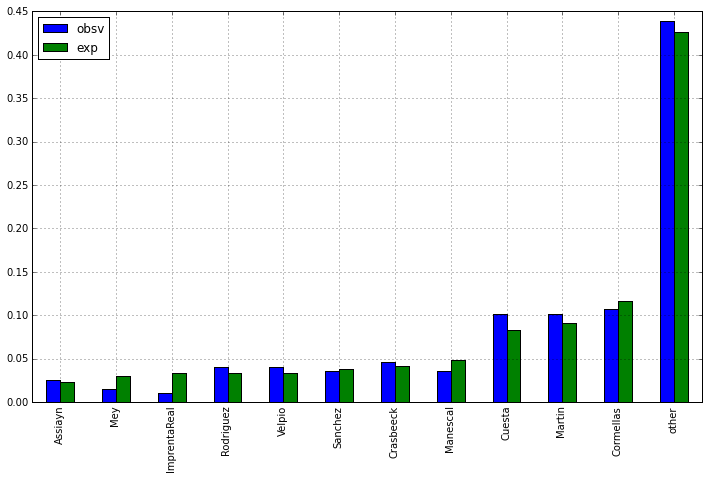

In [59]:
prints = top_prints.sort(columns="exp")
prints.plot(kind="bar")

In [60]:
chisquare(prints.obsv.values, prints.exp.values)

(0.038290219907864763, 0.99999999999878364)

In [61]:
place = pd.concat([samp_place, pop_place], axis=1, keys=["obsv", "exp"]).fillna(0)
top_place = place[place.exp > 4]
bot_place = place[place.exp < 5]
top_place.ix["other"] = [sum(bot_place.obsv.values), sum(bot_place.exp.values)]
top_place.exp = top_place.exp.apply(lambda x: x / sum(top_place.exp.values))
top_place.obsv = top_place.obsv.apply(lambda x: x / sum(top_place.obsv.values))
top_place

,obsv,exp
Alcala,0.015306,0.018868
Barcelona,0.168367,0.177358
Bruselas,0.066327,0.060377
Lerida,0.030612,0.045283
Lisboa,0.086735,0.067925
Madrid,0.316327,0.301887
Milan,0.040816,0.030189
Pamplona,0.030612,0.026415
Sevilla,0.035714,0.037736
Valencia,0.020408,0.045283


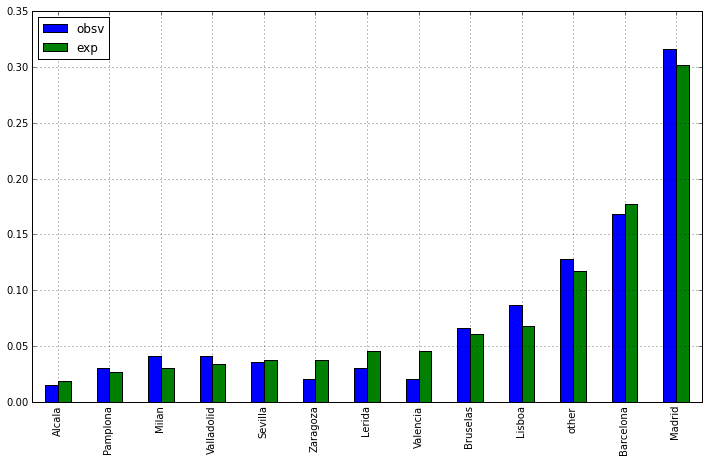

In [62]:
place = top_place.sort(columns="exp")
place.plot(kind="bar")

In [63]:
chisquare(place.obsv.values, place.exp.values)

(0.040842824898993581, 0.99999999999990097)

In [47]:
chisquare([100, 200], [200, 400])

(150.0, 1.7336432457178413e-34)